# Visualize the GLM design matrix

In [1]:
import os
import glob
import numpy as np
import pandas as pd
import brainbox as bb
from scipy import io as sio
import statsmodels.api as sm
from scipy import stats as st
from matplotlib import gridspec
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

In [2]:
%matplotlib inline

In [4]:
# Variables
subtypes = 5
cov = 'ADOS_SOCOM_SEV'
scale = 20
mtp = 'rmap_part'
name = 'site_cross_balanced_288'
pheno_path = '/data1/abide/Pheno/site_cross_balanced_288.csv'

In [5]:
# Get the phenotype data
pheno = pd.read_csv(pheno_path)

In [6]:
# Get the subjects that have the covariate
cov_index = pd.notnull(pheno[cov])
cov_pheno = pheno[cov_index]
# Generate the model matrix
factors = [cov, 'SEX', 'AGE_AT_SCAN', 'FD_scrubbed']
# Make dummy variables for the site factor
site_factor = pd.get_dummies(cov_pheno['SITE_ID'])
# Turn the first site into the intercept
site_factor = site_factor.rename(columns={site_factor.keys()[0]: 'INTERCEPT'})
site_factor['INTERCEPT'] = 1
# Get the other variables
other_factors = cov_pheno.ix[:,factors]
# Turn diagnosis into [0,1] vector
if cov == 'DX_GROUP':
    other_factors[cov] = other_factors[cov].values - 1
else:
    # Demean the covariate
    other_factors[cov] = other_factors[cov]-np.mean(other_factors[cov].values)
    
other_factors['AGE_AT_SCAN'] = other_factors['AGE_AT_SCAN']-np.mean(other_factors['AGE_AT_SCAN'].values)
# Put them back together
glm_pheno = pd.concat([site_factor, other_factors], axis=1)

In [17]:
glm_pheno

,INTERCEPT,PITT,UCLA,USM,ADOS_SOCOM_SEV,SEX,AGE_AT_SCAN,FD_scrubbed
144,1,0,0,0,1.902778,2,-8.185331,0.186210
145,1,0,0,0,1.902778,2,-5.161331,0.162062
146,1,0,0,0,0.902778,2,-2.175331,0.123591
147,1,0,0,0,1.902778,2,-4.285331,0.217021
148,1,0,0,0,0.902778,2,-2.865331,0.127012
149,1,0,0,0,-3.097222,2,-2.175331,0.229729
150,1,0,0,0,-3.097222,2,-6.695331,0.222003
151,1,0,0,0,-3.097222,2,5.884669,0.140855
152,1,0,0,0,-2.097222,2,21.834669,0.143725
153,1,0,0,0,-0.097222,2,8.094669,0.202891


In [22]:
a = glm_pheno.values

In [31]:
a[..., 3:] = a[..., 3:] / np.std(a[..., 3:], 0)

[]

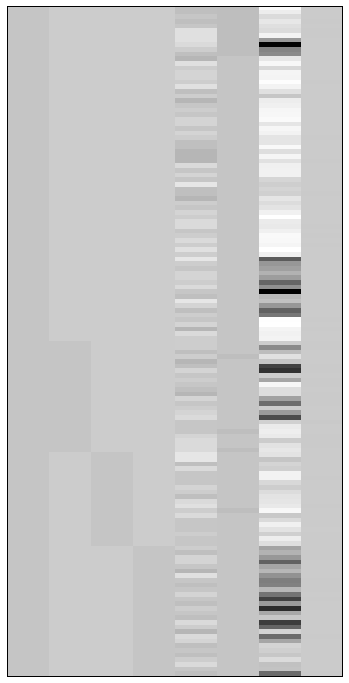

In [33]:
f = plt.figure(figsize=(6, 12))
ax = f.add_subplot(111)
ax.matshow(glm_pheno, cmap=plt.cm.Greys, aspect='auto')
ax.set_xticks([])
ax.set_yticks([])

In [35]:
out_path = '/data1/subtypes/figures_hbm/{}/{}/'.format(mtp, name)
if not os.path.isdir(out_path):
    os.makedirs(out_path)

In [36]:
fig_name = 'glm_model.png'
f.savefig(os.path.join(out_path, fig_name), transparent=False, bbox_inches='tight',
                        pad_inches=0)